In [1]:
print("Hello World!") # This is a comment

Hello World!


This is a markdown test \
$f(x) = mx + b$

In [2]:
import numpy as np #import numpy as np
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt


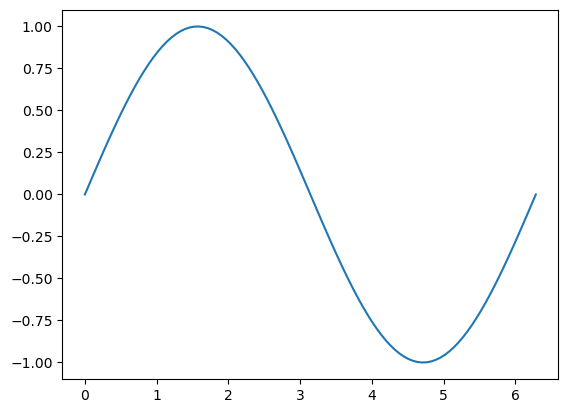

In [3]:
xs = np.linspace(0,2*np.pi,100) # create an array of 100 points between 0 and 2pi (pi = np.pi)
ys = np.sin(xs) # compute the sine of each of those points (np.sin is the sine function)
plt.plot(xs,ys) # plot the points (xs,ys)

In [4]:
rng = np.random.default_rng(0) # create a random number generator with a seed of 0
x = rng.uniform(1.0, 2.0)         # single float in [1,2)
a = rng.uniform(1.0, 2.0, size=5) # 1D array of 5 floats in [1,2)
print(x)
print(a)

1.6369616873214543
[1.26978671 1.04097352 1.01652764 1.81327024 1.91275558]


In [5]:

rng1 = np.random.default_rng(0) # seed of 0
print(rng1.random(), rng1.integers(1,3))

rng2 = np.random.default_rng(0)  # same seed => same outputs
print(rng2.random(), rng2.integers(1,3))

rng3 = np.random.default_rng()   # no seed => non-deterministic
print(rng3.random(), rng3.integers(1,3))

0.6369616873214543 2
0.6369616873214543 2
0.6099328511552514 2


In [6]:
test_samples = [np.random.uniform() for _ in range(100000)]
print(test_samples[:10]) # print the first 10 samples

[0.9060285125177662, 0.5177887681230994, 0.46081688304551116, 0.29002938412417056, 0.971631227038705, 0.03799145456577757, 0.2661490370004913, 0.6738822547980654, 0.009985733009599596, 0.14264696514324815]


In [7]:
another_rng = np.random.default_rng() # no seed => non-deterministic
test_samples = [another_rng.uniform(-1, 1) for _ in range(100000)] # call the method on the generator, specify range, and loop 100,000 times
print(test_samples[:10]) # print the first 10 samples

[-0.6608365415193804, 0.09365183872729399, -0.8354673253019032, -0.35958673089891025, 0.8326370168939414, -0.5233956007361578, -0.22697932569407198, -0.7021191183313171, -0.21539438395268307, -0.693224855197764]


2
4
2.0
4.0
1.23e+04
12345.68
Hello Jake, x ≈ 0.667


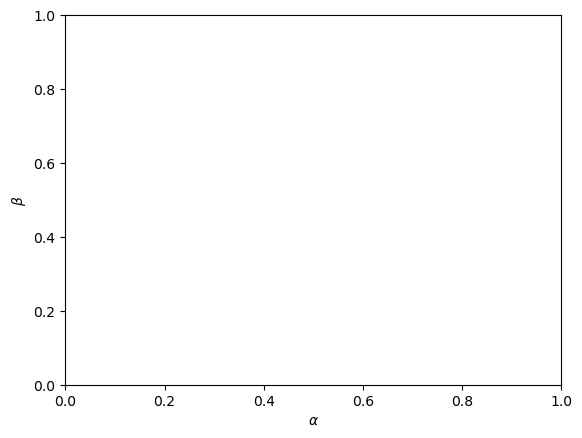

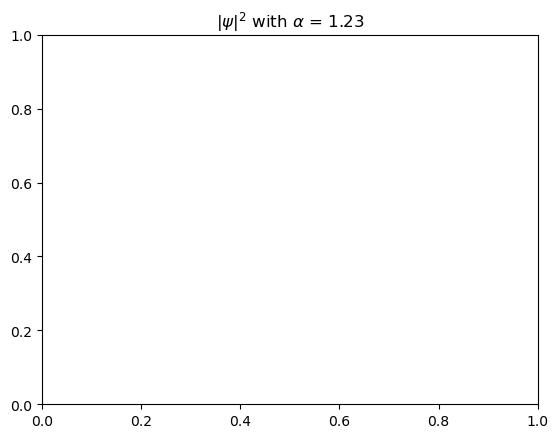

In [8]:
# ========================= Note on Rounding and Formatting =========================

# The built-in round function uses "bankers' rounding" (round half to even)
print(round(2.5))  # Outputs: 2
print(round(3.5))  # Outputs: 4
# NumPy's around function always rounds half away from zero
print(np.around(2.5))  # Outputs: 3.0
print(np.around(3.5))  # Outputs: 4.0

# .e and .f are format specifiers for scientific and fixed-point notation, respectively (the decimals are rounded (banker's) to the specified number of places)
value = 12345.6789
print(f"{value:.2e}")  # Scientific notation with 2 decimal places: 1.23e+04
print(f"{value:.2f}")  # Fixed-point notation with 2 decimal places: 12345.68

# f-strings vs raw strings (r"...") and raw f-strings (rf"...") — quick guide
#
# f"...": interpolate Python expressions inside { } and format with specs.
#   - ROUNDS for display (e.g., :.3f, :.2e), does not change the underlying value.
#   - Examples:
name = "Jake"; x = 2/3
s1 = f"Hello {name}, x ≈ {x:.3f}"          
print(s1) # 'Hello Jake, x ≈ 0.667'
#
# r"...": raw string literal — backslashes are NOT treated as escapes.
#   - Good for LaTeX, regex, Windows paths: r"\alpha\beta" keeps the backslashes (only for rendering in Matplotlib).
#   - No interpolation: { } are literal characters.
#   - Note: a raw string can’t end with a single backslash: r"foo\"  # ❌
latex_str_1 = r"$\alpha$"
latex_str_2 = r"$\beta$"
plt.xlabel(latex_str_1)
plt.ylabel(latex_str_2)
plt.show()

# rf"..."/fr"...": combine BOTH — interpolate AND keep backslashes raw.
#   - Perfect for LaTeX with variables in Matplotlib titles/labels.
#   - Examples:
alpha = 1.2345
title = rf"$|\psi|^2$ with $\alpha$ = {alpha:.2f}"  # LaTeX + formatted value
plt.title(title)
plt.show()

# Tip: If you don’t need interpolation, prefer r"..." for LaTeX.
#      If you do need it, use rf"...". Avoid doubling backslashes when using r/rf.

In [9]:
# ========================= Broadcasting & Pointwise Ops: Quick Reference =========================
# How array operations work in NumPy:
#
# 1) SAME SHAPE -> POINTWISE
#    If two arrays have exactly the same shape, operations are elementwise (pointwise).
#    Example: (2,3) with (2,3)
#
# 2) DIFFERENT SHAPES -> BROADCASTING (conceptual model)
#    NumPy uses broadcasting to make shapes compatible without copying data.
#    Mental model (no actual data is changed unless you reshape explicitly):
#      Step A) ALIGN TRAILING AXES: Conceptually pad the SHORTER shape with LEADING 1s
#              so both shapes have the same number of axes. (Right-to-left alignment.)
#      Step B) COMPATIBILITY CHECK (right → left): each axis pair is compatible if sizes
#              are equal OR one of them is 1. Otherwise -> ValueError.
#      Step C) RESULT SHAPE: take the per-axis maximum across the aligned shapes.
#      Step D) VIRTUAL DUPLICATION: any operand with size 1 on an axis is *logically*
#              repeated along that axis to the result size (no copy; done via strides).
#
#    IMPORTANT: Implicit padding is ALWAYS on the LEFT (leading axes).
#               Example: (3,) with (2,3,4) is treated as (1,1,3) vs (2,3,4), not (3,1,1).
#
# 3) INSERTING SIZE-1 AXES YOURSELF
#    Use None / np.newaxis to explicitly add size-1 axes wherever you want to control alignment.
#    Example: x[:, None] turns shape (N,) into (N,1); x[None, :] turns (N,) into (1,N).
#
# 4) BOOLEAN MASKS + np.where
#    Masks are just boolean arrays that also broadcast. np.where(cond, X, Y) broadcasts cond, X, Y
#    together to a common shape, then selects per element. One-arg form np.where(cond) returns
#    index arrays where cond is True.
#
# 5) PERFORMANCE NOTE
#    Broadcasting reuses memory; it doesn’t make big copies. If you truly need repeated data,
#    use np.tile(...). If you want a broadcasted *view*, use np.broadcast_to(...), which is read-only.
#
# -----------------------------------------------------------------------------------------------
# Minimal runnable demos (with explicit "padding/duplication" commentary)

print("\n[1) SAME SHAPE -> POINTWISE]")
A = np.array([[1,  2,  3],
              [4,  5,  6]])            # shape (2,3)
B = np.array([[10, 20, 30],
              [40, 50, 60]])           # shape (2,3)
# Pointwise: each position (i,j) adds directly, no padding/duplication needed.
print("A+B shape:", (A + B).shape)     # (2,3)
print(A + B)

print("\n[2) BROADCASTING: scalar example (fills every element)]")
scalar = 99.0                           # shape ()  (no axes)
# Conceptually: () -> (1,1) -> duplicates to match (2,3):
# 99  -> [[99]] -> [[99,99,99],
#                  [99,99,99]] (fills every element)
print("(2,3) op () ->", (A + scalar).shape)
print(A + scalar)

print("\n[3) BROADCASTING: implicit left padding, right-to-left comparison]")
rowvec = np.array([100, 200, 300])      # shape (3,)
# Conceptual padding: (3,) -> (1,3) so axes align with A:(2,3)
# Duplication story: [100,200,300] -> [[100,200,300]] -> duplicated across rows ->
# [[100,200,300],
#  [100,200,300]]
print("(2,3) op (3,) ->", (A + rowvec).shape)   # (2,3)
print(A + rowvec)

colvec = np.array([[1],
                   [2]])                # shape (2,1)
# Already 2-D: (2,1) aligns with A:(2,3)
# Duplication story: ([1],[2]])^T -> each row duplicates across columns ->
# [[1,1,1],
#  [2,2,2]]
print("(2,3) op (2,1) ->", (A + colvec).shape)  # (2,3)
print(A + colvec)

print("\n[4) WHEN YOU MUST CONTROL WHICH AXIS MATCHES: insert 1-sized axes explicitly]")

# Base arrays
X = np.zeros((2,3,4))         # (rows=2, cols=3, depth=4)
Y = np.zeros((3,5,20))        # (rows=3, cols=5, depth=20)
x = np.array([10,20,30])      # (3,)

# -----------------------------------------------------------------------------
# Case 1: AUTOMATIC alignment (implicit left padding): (3,) -> (1,1,3)
# -----------------------------------------------------------------------------
# Intuition (rows, cols, depth) with x = [10,20,30]:
#   X.shape = (2,3,4) vs x.shape = (3,) ~ (1,1,3)
#   rows : 1 → 2   (would duplicate single row)
#   cols : 1 → 3   (would duplicate single column)
#   depth: 3 vs 4  ❌ mismatch on the last axis → ValueError (no broadcast)
try:
    R = X + x                       # (1,1,3) vs (2,3,4) → incompatible on last axis
    print("(2,3,4) op (1,1,3) ->", R.shape)
except ValueError as e:
    print("(2,3,4) op (1,1,3) fails (expected):", e)
# -----------------------------------------------------------------------------
# Case 3: Align the '3' with the MIDDLE axis of X: (3,) -> (1,3,1)
# -----------------------------------------------------------------------------
x_mid = x[None, :, None]               # shape (1,3,1)
# Alignment: (1,3,1) + (2,3,4) -> result (2,3,4)
R = X + x_mid
print("(2,3,4) op (1,3,1) ->", R.shape)

# Intuition (rows, cols, depth):
#   rows:  1 → 2  (duplicate single row to 2 rows)
#   cols:  3 = 3  (columns map to [10,20,30])
#   depth: 1 → 4  (repeat across 4 depth slices)
#
# For any fixed depth d:
#   R[:, :, d] =
#     [[10,20,30],
#      [10,20,30]]
#
# For any fixed row r:
#   R[r, :, d] = [10,20,30]    (same for both rows)
#
# For any fixed column c:
#   c=0 → R[:,0,d] = [10,10]
#   c=1 → R[:,1,d] = [20,20]
#   c=2 → R[:,2,d] = [30,30]

# -----------------------------------------------------------------------------
# Case 2: Align the '3' with the FIRST axis of Y: (3,) -> (3,1,1)
# -----------------------------------------------------------------------------
x_first = x[:, None, None]             # shape (3,1,1)
# Alignment: (3,1,1) + (3,5,20) -> result (3,5,20)
S = Y + x_first
print("(3,5,20) op (3,1,1) ->", S.shape)

# Intuition (rows, cols, depth):
#   rows:  3 = 3  (row 0→10, row 1→20, row 2→30)
#   cols:  1 → 5  (duplicate across columns)
#   depth: 1 → 20 (duplicate across depth)
#
# For any fixed row r:
#   S[r, :, d] is a length-5 row, all equal to x[r]  (e.g., row 0 is all 10s)
#
# For any fixed column c:
#   S[:, c, d] = [10,20,30] (down the rows)
#
# For any fixed depth k:
#   S[:, :, k] =
#     [[10,10,10,10,10],
#      [20,20,20,20,20],
#      [30,30,30,30,30]]

print("\n[5) RESULT SHAPE rule: per-axis max after padding]")
# (2,1,3) vs (1,4,1):
# Padding already matches; per-axis max -> (2,4,3)
# Duplication: the (2,1,3) array duplicates along axis 1; the (1,4,1) array duplicates along axes 0 and 2
U = np.zeros((2,1,3))
V = np.zeros((1,4,1))
W = U + V
print("(2,1,3) op (1,4,1) ->", W.shape)  # (2,4,3)
# ================================================================================================





[1) SAME SHAPE -> POINTWISE]
A+B shape: (2, 3)
[[11 22 33]
 [44 55 66]]

[2) BROADCASTING: scalar example (fills every element)]
(2,3) op () -> (2, 3)
[[100. 101. 102.]
 [103. 104. 105.]]

[3) BROADCASTING: implicit left padding, right-to-left comparison]
(2,3) op (3,) -> (2, 3)
[[101 202 303]
 [104 205 306]]
(2,3) op (2,1) -> (2, 3)
[[2 3 4]
 [6 7 8]]

[4) WHEN YOU MUST CONTROL WHICH AXIS MATCHES: insert 1-sized axes explicitly]
(2,3,4) op (1,1,3) fails (expected): operands could not be broadcast together with shapes (2,3,4) (3,) 
(2,3,4) op (1,3,1) -> (2, 3, 4)
(3,5,20) op (3,1,1) -> (3, 5, 20)

[5) RESULT SHAPE rule: per-axis max after padding]
(2,1,3) op (1,4,1) -> (2, 4, 3)


In [10]:
# Basics: boolean masks and np.where (both forms)

# mask = (arr1 == arr2)
# -> boolean array with the *broadcasted shape* of arr1 and arr2, compare elementwise
#    (key rule: per axis, sizes are compatible if equal or one is 1; scalars broadcast to any shape)
#    If arr1 and arr2 have the same shape, mask[i,j] is True iff arr1[i,j] == arr2[i,j], else False
#    If arr2 is a scalar (number): mask[i,j] is True iff arr1[i,j] == arr2[i,j] = arr2 (the scalar broadcasts to arr1’s shape)

# out = np.where(mask, X, Y)
# -> array with the *broadcasted shape* of (mask, X, Y)
#    out[i,j] = X[i,j] if mask[i,j] is True, else Y[i,j]
#    (X and Y can be scalars or arrays; use 0.0 to keep float dtype.)
#
# idx = np.where(mask)    [ONE-ARG FORM]
# -> tuple of index arrays (one per dimension) giving positions where mask is True
#    For 2D: row_indices, col_indices = np.where(mask)

a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[1, 9, 3],
              [0, 5, 0]])
# Build masks
mask_eq3   = (a == 3)               # elementwise equality
mask_gt3   = (a > 3)                # elementwise comparison
mask_even  = (a % 2 == 0)           # parity mask
mask_combo = mask_gt3 & ~mask_even  # combine with & (and), | (or), ~ (not)
mask_meq = (a == b)                 # elementwise comparison → boolean mask (same shape)

print("a:\n", a)
print("\nmask (a == 3):\n", mask_eq3)
print("\nmask (a > 3):\n", mask_gt3)
print("mask (even):\n", mask_even)
print("mask (a>3 AND odd):\n", mask_combo)
print("mask = (A == B):\n", mask_meq)  


# Make arrays print fully and on wide lines
np.set_printoptions(threshold=np.inf, linewidth=10_000)

def show(label, x):
    print(f"{label}:\n{x}\n")  # label on one line, value on the next

# np.where with scalars
show("np.where(mask_eq3, 10, 0)", np.where(mask_eq3, 10, 0))  # True -> 10 else 0

# np.where with arrays
show("np.where(mask_meq, a, b)", np.where(mask_meq, a, b))    # True -> a[i,j] else b[i,j]

# Broadcasting demo with where: row vector broadcasts across rows
rowvec = np.array([100, 200, 300])  # shape (3,)
show("np.where(mask_gt3, rowvec, -1)", np.where(mask_gt3, rowvec, -1)) # True -> rowvec[j] else -1

# One-arg np.where: get row and column indices where True
rows, cols = np.where(mask_eq3)
show("np.where(mask_eq3) -> rows", rows)
show("np.where(mask_eq3) -> cols", cols)

# Using masks to index into an array  (mask.shape == arr.shape)
show("the values where a > 3", a[mask_gt3]) # 1d array of values where mask is True

# Row-mask example: mask.shape == (n_rows,) selects WHOLE ROWS
arr = np.arange(12).reshape(3, 4)
# arr =
# [[ 0,  1,  2,  3],
#  [ 4,  5,  6,  7],
#  [ 8,  9, 10, 11]]

row_mask_1 = np.array([True, False, True])   # shape (3,) -> keep rows 0 and 2
show("arr[row_mask]", arr[row_mask_1])
# -> shape (2, 4); rows 0 and 2
# (arr[row_mask, :] also works)
row_mask_2 = (arr[:, 0] != 0)  # another way: keep rows where column 0 is nonzero; (= [False, True, True])

show("arr[row_mask_2]", arr[row_mask_2])  # -> shape (2, 4); rows 1 and 2

# From those selected rows, pick a single column (column 2) — do it in one shot:
show("arr[row_mask, 2]", arr[row_mask_2, 2])  # -> shape (2,) = [6, 10]
# (arr[row_mask][:, 2] also works, but creates a temporary.)

# Column-mask example: mask over columns (shape == (n_cols,))
col_mask_1 = np.array([False, True, True, False])  # keep columns 1 and 2
show("arr[:, col_mask]", arr[:, col_mask_1])       # -> shape (3, 2)

col_mask_2 = (arr[0, :] % 2 == 1)  # another way: keep columns where row 0 is odd (= [False, True, False, True])
show("arr[:, col_mask_2]", arr[:, col_mask_2])     # -> shape (3, 2); columns 1 and 3

# Combine row & column masks while preserving 2D layout:
show("arr[np.ix_(row_mask, col_mask)]", np.ix_(row_mask_1, col_mask_1))
show("arr[np.ix_(row_mask, col_mask)] values", arr[np.ix_(row_mask_1, col_mask_1)])
# np.ix_ builds a grid index so you can select rows+cols in one go and keep 2D shape.

a:
 [[1 2 3]
 [4 5 6]]

mask (a == 3):
 [[False False  True]
 [False False False]]

mask (a > 3):
 [[False False False]
 [ True  True  True]]
mask (even):
 [[False  True False]
 [ True False  True]]
mask (a>3 AND odd):
 [[False False False]
 [False  True False]]
mask = (A == B):
 [[ True False  True]
 [False  True False]]
np.where(mask_eq3, 10, 0):
[[ 0  0 10]
 [ 0  0  0]]

np.where(mask_meq, a, b):
[[1 9 3]
 [0 5 0]]

np.where(mask_gt3, rowvec, -1):
[[ -1  -1  -1]
 [100 200 300]]

np.where(mask_eq3) -> rows:
[0]

np.where(mask_eq3) -> cols:
[2]

the values where a > 3:
[4 5 6]

arr[row_mask]:
[[ 0  1  2  3]
 [ 8  9 10 11]]

arr[row_mask_2]:
[[ 4  5  6  7]
 [ 8  9 10 11]]

arr[row_mask, 2]:
[ 6 10]

arr[:, col_mask]:
[[ 1  2]
 [ 5  6]
 [ 9 10]]

arr[:, col_mask_2]:
[[ 1  3]
 [ 5  7]
 [ 9 11]]

arr[np.ix_(row_mask, col_mask)]:
(array([[0],
       [2]]), array([[1, 2]]))

arr[np.ix_(row_mask, col_mask)] values:
[[ 1  2]
 [ 9 10]]



In [11]:
# ==================== Matmul (@) rules in NumPy/JAX ====================
# `A @ B` follows np.matmul semantics:
# - Works on the LAST TWO dims as matrices; any leading dims are "batch" and are broadcast.
# - Special cases for 1D array (shape (d,)), no row/column orientation implied:
#     (d,)   @ (d,)        -> ()          # scalar dot
#     (m,n)  @ (n,)        -> (m,)        # matrix–vector (treated as a column vector)
#     (n,)   @ (n,m)       -> (m,)        # vector–matrix (treated as a row vector)
# - Pure 2D "row/column" vectors:
#     (1,n)  @ (n,1)       -> (1,1)       # row · column
#     (n,1)  @ (1,m)       -> (n,m)       # column · row
# - Batched matmul:
#     (B,m,n) @ (B,n,p)    -> (B,m,p)     # batch dims broadcast if compatible


# 1D @ 1D -> scalar
a = np.array([1., 2., 3.])       # (3,)
b = np.array([4., 5., 6.])       # (3,)
s = a @ b                          # ()
print("1D@1D:", s.shape)          # ()

# 2D @ 1D -> vector
M = np.arange(6.).reshape(2,3)    # (2,3)
v = np.array([1., 0., -1.])       # (3,)
y = M @ v                           # (2,)
print("2D@1D:", y.shape)           # (2,)

# 1D @ 2D -> vector
N = np.arange(12.).reshape(3,4)   # (3,4)
z = v @ N                          # (4,)
print("1D@2D:", z.shape)           # (4,)

# If you want explicit row/column behavior, reshape:
row = v[None, :]                    # (1,3)   row vector
col = v[:, None]                    # (3,1)   column vector
rc = row @ col                      # (1,1)
cr = col @ row                      # (3,3)
print("(1,3)@(3,1):", rc.shape, "  (3,1)@(1,3):", cr.shape)

# Batched matmul: leading dims broadcast; last two do matmul
A = np.ones((5, 2, 3))             # (batch=5, 2x3)
B = np.ones((5, 3, 4))             # (batch=5, 3x4)
C = A @ B                            # (5, 2, 4)
print("Batched:", C.shape)

# ---------------- Under the hood intuition ----------------
# For 1D@1D, treats the 1D LHS as (1,n) and the 1D RHS as (n,1) and does (1,n)@(n,1)->(1,1), then squeezes to ().
# For 2D@1D, matmul temporarily treats the 1D RHS as (n,1), does (m,n)@(n,1)->(m,1), then squeezes the trailing size-1 dim -> (m,).
# For 1D@2D, it treats the 1D LHS as (1,n), does (1,n)@(n,m)->(1,m), then squeezes the leading size-1 dim -> (m,).


1D@1D: ()
2D@1D: (2,)
1D@2D: (4,)
(1,3)@(3,1): (1, 1)   (3,1)@(1,3): (3, 3)
Batched: (5, 2, 4)


In [ ]:
# ==================================================================================
# How Python classes & constructors work (quick recap)
# ----------------------------------------------------------------------------------
# There are TWO places you see parentheses with classes, and they mean different things:
#
#   1) class MyClass(Base1, Base2, ...):
#        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#        These parentheses specify BASE CLASSES (inheritance).
#
#   2) obj = MyClass(arg1, arg2, ...)
#                    ^^^^^^^^^^^^^^^
#        These parentheses are a CALL: they pass arguments into MyClass.__init__.
#
# Single Class Example:
#
#     class MyClass:
#         def __init__(self, a, b):
#             print("__init__ called with:", a, b)
#             self.a = a
#             self.b = b
#
#     obj = MyClass(1, 2)
#     # Under the hood: 
#     #   1) Python allocates a new instance `obj` via MyClass.__new__
#     #   2) Calls MyClass.__init__(obj, 1, 2)
#
#     # So inside __init__, `self` is `obj`, a=1, b=2.
#
# Inheritance Example: 
#
#     class Base:
#         def __init__(self, a):
#             print("Base.__init__ called with a =", a)
#             self.a = a                      # instance attribute from Base
#
#         def base_method(self):
#             return f"Base: a = {self.a}"
#
#     class Child(Base):
#         def __init__(self, a, b):
#             print("Child.__init__ (before super), a =", a, "b =", b)
#             # IMPORTANT:
#             #   super().__init__(a) does NOT create a separate Base object.
#             #   It is effectively the same as calling:
#             #       Base.__init__(self, a)
#             #   i.e. it runs Base.__init__ on *this same Child instance*.
#             #   The Child class inherits the attribute `a` from Base, and
#             #   super().__init__(a) initializes that inherited attribute
#             #   on the Child instance.
#             super().__init__(a)
#             print("Child.__init__(after super)")
#             self.b = b                      # instance attribute from Child
#
#         def child_method(self):
#             return f"Child: a = {self.a}, b = {self.b}"
#
#     c = Child(1, 2)
#     # prints:
#     #   Child.__init__ (before super), a = 1 b = 2
#     #   Base.__init__ called with a = 1
#     #   Child.__init__ (after super)
#
#     # What attributes does `c` have?
#     print(c.a)              # 1  (set in Base.__init__ via super().__init__(a))
#     print(c.b)              # 2  (set in Child.__init__)
#
#     # What methods can `c` use?
#     print(c.base_method())  # "Base: a = 1"     (inherited from Base)
#     print(c.child_method()) # "Child: a = 1, b = 2" (defined in Child)
#
# Key points:
#   • Child(Base) means Child INHERITS from Base.
#   • Child.__init__(self, a, b) accepts both a and b.
#   • super().__init__(a) forwards `a` into Base.__init__, which sets self.a.
#   • Then Child.__init__ sets self.b.
#
#   So a Child instance has:
#       - self.a  from Base
#       - self.b  from Child
#       - base_method() from Base
#       - child_method() from Child
#
#   `super()` in Child.__init__ walks the MRO (Child → Base → object),
#   finds Base, and calls Base.__init__(self, a) for you.
#
#
# Classes Without Explicit __init__ Example: 
#
# If you define a class with no __init__, Python still gives you a default constructor via object.__init__. You can STILL define class attributes in the class body and access them without ever creating instances.
#
#     class Base:
#         a = 10              # class attribute
#         b = 20              # class attribute
#
#     # You can access these directly on the class:
#     print(Base.a)           # 10
#     print(Base.b)           # 20
#
#     # You *can* also construct an instance, even without __init__:
#     obj = Base()            # uses object.__init__(self) under the hood
#
#     # Instance attribute lookup falls back to the class:
#     print(obj.a)            # 10  (found on Base, since obj has no 'a' yet)
#     print(obj.b)            # 20
#
# Under the hood:
#   • Python creates a class object Base (an instance of `type`).
#   • Base.__init__ is inherited from `object.__init__`, which takes only `self`.
#   • Calling Base() allocates a new instance and calls object.__init__(self),
#     which does nothing special (no custom attributes are set).
#
# If you assign to obj.a, you create an INSTANCE attribute that shadows the
# class attribute:
#     obj.a = 99
#     print(obj.a)   # 99  (instance attribute wins)
#     print(Base.a)  # 10  (class attribute unchanged)
#
# These classes are used as namespaces to group related functions or constants.
#
# Method overriding (child replaces or extends base behavior)
# ----------------------------------------------------------------------------------
# "Overriding" means: a child class defines a method with the SAME NAME as a
# method in the base class. Python will use the child's version when called
# on a child instance.
#
# Simple overriding (with constructors + instance attributes):
#
#     class Base:
#         def __init__(self, a):
#             self.a = a
#
#         def describe(self):
#             return f"Base: a = {self.a}"
#
#     class Child(Base):
#         def __init__(self, a, b):
#             super().__init__(a)      # sets self.a in Base
#             self.b = b              # sets self.b in Child
#
#         def describe(self):         # override Base.describe
#             return f"Child: a = {self.a}, b = {self.b}"
#
#     obj_base  = Base(10)
#     obj_child = Child(1, 2)
#
#     print(obj_base.describe())   # "Base: a = 10"
#     print(obj_child.describe())  # "Child: a = 1, b = 2" (Child overrides Base)
#
# How does Python decide which method to use?
#   • It looks at the instance type (Child).
#   • It walks the MRO: Child → Base → object.
#   • It finds Child.describe first, and stops there.
#
#
# Overriding + calling the base method (extending behavior):
#
# Sometimes you want to override a method, but still reuse the base version
# and then add extra behavior (similar to what we did with __init__ + super()).
#
#     class Base:
#         def __init__(self, a):
#             self.a = a
#
#         def describe(self):
#             return f"Base: a = {self.a}"
#
#     class Child(Base):
#         def __init__(self, a, b):
#             super().__init__(a)
#             self.b = b
#
#         def describe(self):
#             base_str = super().describe()   # call Base.describe(self)
#             return base_str + f", b = {self.b}"
#
#     c = Child(1, 2)
#     print(c.describe())   # "Base: a = 1, b = 2"
#
# Key points about overriding:
#   • Same method name in child shadows the base implementation.
#   • super().method(...) lets the child call the base version explicitly.
#   • Methods typically read from instance attributes set in __init__, so
#     overriding __init__ and overriding methods often go hand-in-hand.
#
# Note on super() and parent __init__/methods
# -------------------------------------------
# In all of these examples, we NEVER "just" call the parent class on its own
# using super, e.g. we don't do something like:
#
#     super().__init__()    # at top level, or to create a separate Base object
#
# That's not what super() does.
#
# Important points:
#   • super() does NOT create a new parent instance.
#   • super() returns a proxy that lets you call methods on the SAME instance
#     (`self`), but starting lookup from the parent class in the MRO.
#   • When you call super().__init__(...), you must pass arguments that match
#     the PARENT's __init__ signature (except for `self`, which is supplied
#     automatically).
#
# So when we write:
#
#     class Child(Base):
#         def __init__(self, a, b):
#             super().__init__(a)   # calls Base.__init__(self, a) on *this* object
#             self.b = b
#
#     class Child2(Base):
#         def describe(self):
#             base_str = super().describe()   # calls Base.describe(self)
#             return base_str + " + Child2"
#
# we are:
#   • Already inside a Child/Child2 method (we have a `self`).
#   • Using super() to route the method call to the Base implementation
#     for the SAME underlying object.
#
# You can absolutely see code like super().__init__() with no extra args,
# but that's only when the parent __init__ takes only self or only has
# optional arguments (i.e. parameters with default values):
#
#     class Base:
#         def __init__(self):
#             print("Base.__init__ (no required args)")
#
#     class Child(Base):
#         def __init__(self):
#             super().__init__()    # OK: forwards to Base.__init__(self)
#             print("Child.__init__ finished")
#
# In contrast, if Base.__init__ expects required arguments, you MUST pass them:
#
#     class Base:
#         def __init__(self, a):
#             self.a = a
#
#     class Child(Base):
#         def __init__(self, a, b):
#             super().__init__(a)   # OK: Base.__init__(self, a)
#             self.b = b
#
#     # super().__init__()  # <-- This would be an error here: missing 'a'
#
# Summary: parent __init__ cases
# ------------------------------
#   1) Parent defines no __init__ at all:
#        class Base:              # inherits object.__init__(self)
#            pass
#
#      • You can skip super().__init__ entirely, or call super().__init__()
#        (which will just call object.__init__(self) and do nothing special).
#
#   2) Parent defines __init__(self) (no extra required args):
#        class Base:
#            def __init__(self):
#                ...
#
#        class Child(Base):
#            def __init__(self):
#                super().__init__()   # OK: no extra args needed
#                ...
#
#      • This is the pattern you see in many frameworks (e.g., nn.Module,
#        Dataset-style bases) where the base does some internal setup but
#        doesn't require explicit parameters from you.
#
#   3) Parent defines __init__(self, a, b, ...):
#        class Base:
#            def __init__(self, a, b):
#                self.a = a
#                self.b = b
#
#        class Child(Base):
#            def __init__(self, a, b, c):
#                super().__init__(a, b)   # MUST pass required args
#                self.c = c
#
# The pattern is always:
#   - Define a method on the child (e.g. __init__, describe, etc.).
#   - Inside that method, use super().method(...) to reuse or extend
#     the parent's behavior on the SAME instance, passing whatever
#     arguments the parent method actually requires (or none, if it
#     only takes self or has only optional parameters).

In [ ]:
# ===========================================================
# NumPy: Reshaping, Index Mapping, and a Concrete 2D Example
# ===========================================================
#
# 0. General setup: what is reshaping?
# ------------------------------------
# Let an array have original shape
#
#     (d0, d1, ..., d_{k-1})
#
# A multi-index is
#
#     i = (i0, i1, ..., i_{k-1})
#
# with 0 <= ij < dj.
#
# The total number of elements is
#
#     N = d0 * d1 * ... * d_{k-1}
#
# A reshape to a new shape
#
#     (e0, e1, ..., e_{m-1})
#
# is valid iff
#
#     e0 * e1 * ... * e_{m-1} == N
#
# Conceptually, ANY reshape can be viewed as two steps:
#
#     (old multi-index i)  ->  linear index n  ->  (new multi-index j')
#
# The only difference between row-major (C-order) and column-major (F-order)
# is how we compute n from i, and how we "unflatten" n back to j'.
#
#
# 1. Row-major ("C order"): last axis changes fastest
# ---------------------------------------------------
# NumPy's default (`order='C'`).
#
# Original shape: (d0, d1, ..., d_{k-1})
# Original multi-index: i = (i0, i1, ..., i_{k-1})
#
# 1.1 Flatten: (i0,...,i_{k-1}) -> n_C
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# C-order linear index:
#
#     n_C = sum_{j=0}^{k-1} i_j * product_{m=j+1}^{k-1} d_m
#
# Written out:
#
#     n_C = i0 * (d1*d2*...*d_{k-1}) +
#           i1 * (d2*d3*...*d_{k-1}) +
#           ...
#           i_{k-2} * d_{k-1} +
#           i_{k-1}
#
# Special 2D case (shape (H, W), index (i, j)):
#
#     n_C = i * W + j
#
#
# 1.2 Reshape: n_C -> (j0',...,j_{m-1}') in new shape (e0,...,e_{m-1})
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# New shape: (e0, e1, ..., e_{m-1}), same total size N.
#
# We unflatten n_C using the same row-major logic but with the e's:
#
#     n_temp = n_C
#     for r in range(m):
#         # denominator for axis r: product of remaining sizes
#         denom = product_{p=r+1}^{m-1} e_p   # if r == m-1, take denom = 1
#         j_r = n_temp // denom
#         n_temp = n_temp % denom
#
# Result:
#
#     j' = (j0, j1, ..., j_{m-1})
#
# and for B = A.reshape(e0,...,e_{m-1}, order='C'):
#
#     B[j0, j1, ..., j_{m-1}] == A[i0, i1, ..., i_{k-1}]
#
#
# 2. Column-major ("Fortran order"): first axis changes fastest
# -------------------------------------------------------------
# `order='F'` in NumPy.
#
# Original shape: (d0, d1, ..., d_{k-1})
# Original multi-index: i = (i0, i1, ..., i_{k-1})
#
# 2.1 Flatten: (i0,...,i_{k-1}) -> n_F
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# F-order linear index:
#
#     n_F = sum_{j=0}^{k-1} i_j * product_{m=0}^{j-1} d_m
#
# (with the convention that product over an empty set is 1).
#
# Written out:
#
#     n_F = i0 +
#           i1 * d0 +
#           i2 * (d0*d1) +
#           ...
#           i_{k-1} * (d0*d1*...*d_{k-2})
#
# Special 2D case (shape (H, W), index (i, j)):
#
#     n_F = j * H + i
#
#
# 2.2 Reshape: n_F -> (j0',...,j_{m-1}') in new shape (e0,...,e_{m-1})
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# For F-order, the first axis changes fastest, so we peel off indices with
# mod/div by e0, e1, ..., e_{m-1}:
#
#     n_temp = n_F
#     for r in range(m):
#         j_r = n_temp %  e_r
#         n_temp = n_temp // e_r
#
# Result:
#
#     j' = (j0, j1, ..., j_{m-1})
#
# and for B_F = A.reshape(e0,...,e_{m-1}, order='F'):
#
#     B_F[j0, j1, ..., j_{m-1}] == A[i0, i1, ..., i_{k-1}]
#
#
# 3. Concrete 2D example: (H, W) = (3, 4) -> (H', W') = (4, 3)
# ============================================================
#
# We now make everything explicit for a 2D example.
#
# Let
#
#     A = np.arange(12).reshape(3, 4)
#
# so
#
#     A =
#     [[ 0,  1,  2,  3],
#      [ 4,  5,  6,  7],
#      [ 8,  9, 10, 11]]
#
# Original shape: (H, W) = (3, 4)
# New shape:      (H', W') = (4, 3)
# Total size:     3*4 = 4*3 = 12
#
#
# 3.1 Row-major (C-order) example
# -------------------------------
#
# Flattening: (i, j) -> n_C -> v[n_C]
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# For (H, W) = (3, 4):
#
#     n_C = i * W + j
#
# Enumerate all entries:
#
# Row 0 (i=0):
#     A[0,0] =  0 -> n = 0*4 + 0 =  0 -> v[0]  =  0
#     A[0,1] =  1 -> n = 0*4 + 1 =  1 -> v[1]  =  1
#     A[0,2] =  2 -> n = 0*4 + 2 =  2 -> v[2]  =  2
#     A[0,3] =  3 -> n = 0*4 + 3 =  3 -> v[3]  =  3
#
# Row 1 (i=1):
#     A[1,0] =  4 -> n = 1*4 + 0 =  4 -> v[4]  =  4
#     A[1,1] =  5 -> n = 1*4 + 1 =  5 -> v[5]  =  5
#     A[1,2] =  6 -> n = 1*4 + 2 =  6 -> v[6]  =  6
#     A[1,3] =  7 -> n = 1*4 + 3 =  7 -> v[7]  =  7
#
# Row 2 (i=2):
#     A[2,0] =  8 -> n = 2*4 + 0 =  8 -> v[8]  =  8
#     A[2,1] =  9 -> n = 2*4 + 1 =  9 -> v[9]  =  9
#     A[2,2] = 10 -> n = 2*4 + 2 = 10 -> v[10] = 10
#     A[2,3] = 11 -> n = 2*4 + 3 = 11 -> v[11] = 11
#
# So
#
#     v = A.flatten(order='C') = [0,1,2,3,4,5,6,7,8,9,10,11]
#
#
# Reshaping: n_C -> (i', j') in shape (H', W') = (4, 3)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Define
#
#     B = A.reshape(4, 3)  # C-order
#
# For new shape (4,3), row-major unflatten:
#
#     i' = n // W'      # W' = 3
#     j' = n %  W'
#
# Compute B[i', j']:
#
# Row i' = 0:
#     n = 0:  i' = 0//3 = 0, j' = 0%3 = 0 -> B[0,0] = v[0]  = 0
#     n = 1:  i' = 1//3 = 0, j' = 1%3 = 1 -> B[0,1] = v[1]  = 1
#     n = 2:  i' = 2//3 = 0, j' = 2%3 = 2 -> B[0,2] = v[2]  = 2
#
# Row i' = 1:
#     n = 3:  i' = 3//3 = 1, j' = 3%3 = 0 -> B[1,0] = v[3]  = 3
#     n = 4:  i' = 4//3 = 1, j' = 4%3 = 1 -> B[1,1] = v[4]  = 4
#     n = 5:  i' = 5//3 = 1, j' = 5%3 = 2 -> B[1,2] = v[5]  = 5
#
# Row i' = 2:
#     n = 6:  i' = 6//3 = 2, j' = 6%3 = 0 -> B[2,0] = v[6]  = 6
#     n = 7:  i' = 7//3 = 2, j' = 7%3 = 1 -> B[2,1] = v[7]  = 7
#     n = 8:  i' = 8//3 = 2, j' = 8%3 = 2 -> B[2,2] = v[8]  = 8
#
# Row i' = 3:
#     n =  9: i' = 9//3  = 3, j' = 9%3  = 0 -> B[3,0] = v[9]  =  9
#     n = 10: i' =10//3 = 3, j'=10%3  = 1 -> B[3,1] = v[10] = 10
#     n = 11: i' =11//3 = 3, j'=11%3  = 2 -> B[3,2] = v[11] = 11
#
# Thus
#
#     B =
#     [[ 0,  1,  2],
#      [ 3,  4,  5],
#      [ 6,  7,  8],
#      [ 9, 10, 11]]
#
# and every entry satisfies
#
#     B[i', j'] = v[n] = A[i, j]
#     with  n = i*W + j,  i' = n//W',  j' = n%W'.
#
# As we walk through the flattened array, we fill the new matrix by moving
# across each row from left to right, then proceeding to the next row.
#
#
# 3.2 Column-major (F-order) example
# ----------------------------------
#
# Now repeat with column-major ordering.
#
# Let
#
#     A_F = np.arange(12).reshape(3, 4, order='F')
#
# so
#
#     A_F =
#     [[ 0,  3,  6,  9],
#      [ 1,  4,  7, 10],
#      [ 2,  5,  8, 11]]
#
#
# Flattening: (i, j) -> n_F -> w[n_F]
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# For (H, W) = (3, 4) in F-order:
#
#     n_F = j * H + i
#
# Enumerate:
#
# Column j = 0:
#     A_F[0,0] =  0 -> n = 0*3 + 0 =  0 -> w[0]  =  0
#     A_F[1,0] =  1 -> n = 0*3 + 1 =  1 -> w[1]  =  1
#     A_F[2,0] =  2 -> n = 0*3 + 2 =  2 -> w[2]  =  2
#
# Column j = 1:
#     A_F[0,1] =  3 -> n = 1*3 + 0 =  3 -> w[3]  =  3
#     A_F[1,1] =  4 -> n = 1*3 + 1 =  4 -> w[4]  =  4
#     A_F[2,1] =  5 -> n = 1*3 + 2 =  5 -> w[5]  =  5
#
# Column j = 2:
#     A_F[0,2] =  6 -> n = 2*3 + 0 =  6 -> w[6]  =  6
#     A_F[1,2] =  7 -> n = 2*3 + 1 =  7 -> w[7]  =  7
#     A_F[2,2] =  8 -> n = 2*3 + 2 =  8 -> w[8]  =  8
#
# Column j = 3:
#     A_F[0,3] =  9  -> n = 3*3 + 0 =  9  -> w[9]  =  9
#     A_F[1,3] = 10  -> n = 3*3 + 1 = 10  -> w[10] = 10
#     A_F[2,3] = 11  -> n = 3*3 + 2 = 11  -> w[11] = 11
#
# So
#
#     w = A_F.flatten(order='F') = [0,1,2,3,4,5,6,7,8,9,10,11]
#
#
# Reshaping: n_F -> (i', j') in shape (H', W') = (4, 3)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Define
#
#     B_F = A_F.reshape(4, 3, order='F')
#
# For F-order and new shape (H', W') = (4, 3):
#
#     i' = n_F %  H_prime
#     j' = n_F // H_prime
#
# Compute B_F[i', j']:
#
# Column j' = 0:
#     n = 0:  i'=0%4=0, j'=0//4=0 -> B_F[0,0] = w[0]  =  0
#     n = 1:  i'=1%4=1, j'=1//4=0 -> B_F[1,0] = w[1]  =  1
#     n = 2:  i'=2%4=2, j'=2//4=0 -> B_F[2,0] = w[2]  =  2
#     n = 3:  i'=3%4=3, j'=3//4=0 -> B_F[3,0] = w[3]  =  3
#
# Column j' = 1:
#     n = 4:  i'=4%4=0, j'=4//4=1 -> B_F[0,1] = w[4]  =  4
#     n = 5:  i'=5%4=1, j'=5//4=1 -> B_F[1,1] = w[5]  =  5
#     n = 6:  i'=6%4=2, j'=6//4=1 -> B_F[2,1] = w[6]  =  6
#     n = 7:  i'=7%4=3, j'=7//4=1 -> B_F[3,1] = w[7]  =  7
#
# Column j' = 2:
#     n = 8:   i'=8%4=0, j'=8//4=2 -> B_F[0,2] = w[8]  =  8
#     n = 9:   i'=9%4=1, j'=9//4=2 -> B_F[1,2] = w[9]  =  9
#     n = 10:  i'=10%4=2,j'=10//4=2-> B_F[2,2] = w[10] = 10
#     n = 11:  i'=11%4=3,j'=11//4=2-> B_F[3,2] = w[11] = 11
#
# Thus
#
#     B_F =
#     [[ 0,  4,  8],
#      [ 1,  5,  9],
#      [ 2,  6, 10],
#      [ 3,  7, 11]]
#
# and
#
#     B_F[i', j'] = w[n_F] = A_F[i, j]
#     with  n_F = j*H + i,  i' = n_F % H',  j' = n_F // H'.
#
# As we walk through the flattened array, we fill the new matrix by moving
# down each column from top to bottom, then proceeding to the next column.
#
#
# Summary:
# --------
# - Row-major (C):    n = i*W + j;   i' = n//W',  j' = n%W'.
# - Column-major (F): n = j*H + i;   i' = n%H',   j' = n//H'.
#
# Reshape is literally:
#
#     (old (i,j)) -> n -> (new (i',j'))
#
# with the same 1D order [0,1,...,11]; only the (i,j) ↔ n mapping differs.

A =
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
A.shape = (3, 4)

v = A.flatten() = [ 0  1  2  3  4  5  6  7  8  9 10 11]
v.shape = (12,)

A[2, 1] = 9
v[9]      = 9

Recovered indices from n:
i2 = 2 j2 = 1

A2 = v.reshape(H, W) =
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
A2.shape = (3, 4)
A2 equal to original A? -> True



"\nNotes:\n------\n1. C-order vs F-order:\n   - By default, NumPy uses C-order (row-major):\n       - Last index changes fastest.\n       - `reshape` and `flatten` preserve the row-major index mapping.\n   - You can specify `order='F'` (Fortran / column-major), where the\n     *first* index changes fastest:\n       v_F = A.flatten(order='F')\n     Then the mapping becomes something like:\n       n = j * H + i\n     instead of n = i * W + j.\n\n2. reshape vs flatten:\n   - `A.reshape(new_shape)` returns a *view* when possible:\n       - No copy if the memory layout is compatible.\n   - `A.flatten()` always returns a **copy** by default\n     (there is also `ravel()` which prefers a view).\n   - In both cases, with default `order='C'`, the logical index mapping\n     n ↔ (i, j, ...) is consistent.\n\n3. Higher dimensions:\n   - For shape (d0, d1, d2, ..., d_{k-1}) in C-order, the flattened\n     index n for indices (i0, i1, ..., i_{k-1}) is:\n\n         n = (((i0 * d1 + i1) * d2 + i2) * 

In [ ]:
# ============================================================
# Storing functions on grids: f(x), f(x,y), f(x,y,t), f(x0,...)
# ============================================================
# General idea:
#   We want to represent a continuous field f(x_0, x_1, ...) as a discrete array F[...] whose entries are indexed by integer grid indices (i_0, i_1, i_2, ...) instead of by the continuous coordinates (x_0, x_1, x_2, ...).

#   A simple and very common choice is:
#       axis 0 ↔ x_0
#       axis 1 ↔ x_1
#       axis 2 ↔ x_2
#       axis 3 ↔ x_3
#       ...
#
#   np.meshgrid with indexing='ij' builds coordinate grids X_0, X_1, X_2, X_3, ... that implement exactly this mapping.
#
# Setup:
#   1D coordinate arrays:
#       x_0s: shape (n0,)
#       x_1s: shape (n1,)
#       x_2s: shape (n2,)
#       x_3s: shape (n3,)
#       ...
#
#   X_0, X_1, X_2, X_3, ... = np.meshgrid(x_0s, x_1s, x_2s, x_3s, ..., indexing='ij')
#
# Shapes:
#   X_0.shape == X_1.shape == X_2.shape == X_3.shape ==...== (n0, n1, n2, n3,...)
#
# Semantics:
#   For any multi-index (i0, i1, i2, ...):
#
#       X_0[i0, i1, i2, i3, ...] = x_0s[i0]   # axis 0 samples x_0
#       X_1[i0, i1, i2, i3, ...] = x_1s[i1]   # axis 1 samples x_1
#       X_2[i0, i1, i2, i3, ...] = x_2s[i2]   # axis 2 samples x_2
#       X_3[i0, i1, i2, i3, ...] = x_3s[i3]   # axis 3 samples x_3
#       ...
#
#   That is, the k-th grid X_k stores the k-th coordinate x_k:
#       • Along axis k, X_k varies with index i_k (sampling x_k).
#       • Along all other axes, X_k is constant in those directions.
#
#   A field sampled on this grid is then:
#
#       F[i0, i1, i2, i3, ...] =
#           f(X_0[i0, i1, i2, i3, ...],
#             X_1[i0, i1, i2, i3, ...],
#             X_2[i0, i1, i2, i3, ...],
#             X_3[i0, i1, i2, i3, ...], ...)
#         = f(x_0s[i0], x_1s[i1], x_2s[i2], x_3s[i3], ...)
#
# If we want a different axis ↔ coordinate mapping, we can choose a permutation σ of {0, 1, 2, 3, ...} so that:
#
#   axis 0 ↔ x_{σ(0)}
#   axis 1 ↔ x_{σ(1)}
#   axis 2 ↔ x_{σ(2)}
#   axis 3 ↔ x_{σ(3)}
#   ...
#
# Then you build coordinate grids with meshgrid in the SAME order as the axes
#
#   X_0, X_1, X_2, X_3,.. = np.meshgrid( x_{σ(0)}s, x_{σ(1)}s, x_{σ(2)}s, x_{σ(3)}s, indexing='ij')
#
# so that:
#   X_0.shape == X_1.shape == X_2.shape == X_3.shape ==...== (n_{σ(0)}, n_{σ(1)}, n_{σ(2)}, n_{σ(3)}...)
#
# where:
#
#   X_0[i0, i1, i2, i3,..] = x_{σ(0)}s[i0] # axis 0 samples x_{σ(0)}
#   X_1[i0, i1, i2, i3,...] = x_{σ(1)}s[i1] # axis 1 samples x_{σ(1)}
#   X_2[i0, i1, i2, i3,...] = x_{σ(2)}s[i2] # axis 2 samples x_{σ(2)}
#   X_3[i0, i1, i2, i3,...] = x_{σ(3)}s[i3] # axis 3 samples x_{σ(3)}
#   ...

# If we now want to write F with indices ordered by *coordinates* (x_0, x_1, ...),
# we can say: the index used for x_k is i_{σ(k)}. In that notation:
#
#   F[i_{σ(0)}, i_{σ(1)}, i_{σ(2)}, ...] =
#       f( x_0s[i_0],
#          x_1s[i_1],
#          x_2s[i_2], ... )
#
# and, equivalently in terms of the grids Xr:
#
#   F[i_{σ(0)}, i_{σ(1)}, i_{σ(2)}, ...] =
#       f( X_{σ^{-1}(0)}[i_0, i_1, i_2, ...],
#          X_{σ^{-1}(1)}[i_0, i_1, i_2, ...],
#          X_{σ^{-1}(2)}[i_0, i_1, i_2, ...], ... )
#
#
# and a field sampled on this grid is:
#
#   F[i_{σ(0)}, i_{σ(1)}, i_{σ(2)}, ...] =
#       f(X0[i0, i1, i2, i3, ...],
#         X1[i0, i1, i2, i3, ...],
#         X2[i0, i1, i2, i3, ...],
#         X3[i0, i1, i2, i3, ...], ...)
#     = f(x_{σ(0)}s[i0],
#         x_{σ(1)}s[i1],
#         x_{σ(2)}s[i2],
#         x_{σ(3)}s[i3], ...)
#
# In other words:
#   • The permutation σ tells you which coordinate x_k each axis r represents.
#   • The meshgrid call orders the 1D arrays accordingly.
#   • F[...] is just f evaluated at (x_{σ(0)}[i0], x_{σ(1)}[i1], x_{σ(2)}[i2], ...).
#
# Below, we specialize this to:
#   • 1D: f(x)
#   • 2D: f(x, y)
#   • 2D + time: f(x, y, t)
#
# 1) 1D function f(x)
# -------------------
#   xs: shape (nx,)
#   f(x) sampled as:
#
#     F[i] = f(xs[i])          # F.shape = (nx,)
#
# 2) 2D function f(x, y)
# ----------------------
# Our usual convention for fields (images, ψ(x,y,t) at fixed t, etc.) is the *Cartesian* one:
#
#   • horizontal axis = x (columns, increasing to the right)
#   • vertical axis   = y (rows, increasing downward)
#
# In terms of coordinates (x_0, x_1) = (x, y), we choose a permutation σ with:
#   σ(0) = 1   (axis 0 indexes y = x_1)
#   σ(1) = 0   (axis 1 indexes x = x_0)
#
# On the array, that means:
#
#   axis 0 (rows)    ↔ y = x_1
#   axis 1 (columns) ↔ x = x_0
#
# and we *still* index the array as F[j, i], where:
#   j = i0 = index along axis 0 (y-index)
#   i = i1 = index along axis 1 (x-index)
#
# So values are stored as:
#
#   F[j, i] = F[i0, i1] = f(x_{σ(1)}[i], x_{σ(0)}[j]) = f(x_0[i], x_1[j]) = f(x_i, y_j)
#
# with:
#   x_i = xs[i],  y_j = ys[j].
#
# Implementing this with meshgrid and indexing='ij'
# -------------------------------------------------
# Given:
#   xs: shape (nx,)
#   ys: shape (ny,)
#
# we want:
#   X_grid[j, i] = x_i
#   Y_grid[j, i] = y_j
#
# This is achieved by:
#
#   Y_grid, X_grid = np.meshgrid(ys, xs, indexing='ij')
#
# Check:
#   Y_grid[j, i] = ys[j] = y_j    # axis 0 → y
#   X_grid[j, i] = xs[i] = x_i    # axis 1 → x
#
# So a field sampled on this grid is:
#
#   F[j, i] = f(X_grid[j, i], Y_grid[j, i]) = f(x_i, y_j)
#
#
# 'xy' indexing as a convenient shorthand
# ---------------------------------------
# Instead of writing (ys, xs) with indexing='ij' and then naming the outputs
# (Y_grid, X_grid), NumPy provides a 2D shorthand for this Cartesian convention:
#
#   X, Y = np.meshgrid(xs, ys, indexing='xy')
#
# Then:
#   X[j, i] = xs[i] = x_i    # columns → x
#   Y[j, i] = ys[j] = y_j    # rows    → y
#
# so we can store:
#
#   F[j, i] = f(X[j, i], Y[j, i]) = f(x_i, y_j)
#
# In other words, for the 2D Cartesian convention:
#   • our σ is the swap (axis 0 ↔ y, axis 1 ↔ x),
#   • the underlying 'ij' construction is:
#         Y, X = np.meshgrid(ys, xs, indexing='ij')
#   • and indexing='xy' with (xs, ys) is just a handy shorthand that
#     directly gives grids aligned with F[j, i] = f(x_i, y_j).
#
# The key point: we always index arrays as F[axis0_index, axis1_index] = F[j, i].
# The permutation σ only tells us which *coordinate* each axis index corresponds to,
# not that we should permute the indices themselves.
#
# 3) 3D function f(x, y, t) (e.g. wave/Schrödinger fields)
# --------------------------------------------------------
# Typically we keep the same "rows = y, columns = x" idea for space,
# and add time as a separate axis:
#
#   xs: shape (nx,)
#   ys: shape (ny,)
#   ts: shape (nt,)
#
#   X, Y = np.meshgrid(xs, ys, indexing='xy')   # space grid
#
# For a time-dependent field u(x, y, t) sampled on a grid:
#
#   u[j, i, k] = u(x_i, y_j, t_k)
#
# with:
#   • axis 0 (j) → y index (rows, downwards)
#   • axis 1 (i) → x index (columns, rightwards)
#   • axis 2 (k) → time index
#
# Example:
#   psi_r = np.zeros((ny, nx, nt))
#   psi_i = np.zeros((ny, nx, nt))
#
#   # initial condition at t_0:
#   psi_r[:, :, 0] = f(X, Y)
#   psi_i[:, :, 0] = g(X, Y)
#
# where X[j, i] = x_i, Y[j, i] = y_j, so
#   psi_r[j, i, 0] = f(x_i, y_j), psi_i[j, i, 0] = g(x_i, y_j).
#
#
# 4) Higher dimensions: f(x_0, x_1, x_2, x_3, ...)
# ------------------------------------------------
#
# More generally, suppose you have 1D grids:
#   x_0s: shape (n0,)
#   x_1s: shape (n1,)
#   x_2s: shape (n2,)
#   x_3s: shape (n3,)
#   ...
#
# We want to store samples of a function
#   f(x_0, x_1, x_2, x_3, ...)
# on a multidimensional array F.
#
# In words:
#   • Decide which array axis (i0, i1, i2, i3, ...) corresponds to which coordinate x_k.
#   • This choice can be described by a permutation σ of {0, 1, 2, 3, ...}.
#   • Axis r will index coordinate x_{σ(r)}.
#
# For example, if σ is the identity, then:
#   axis 0 ↔ x_0
#   axis 1 ↔ x_1
#   axis 2 ↔ x_2
#   axis 3 ↔ x_3
#   ...
#
# More generally, for some permutation σ:
#   axis 0 ↔ x_{σ(0)}
#   axis 1 ↔ x_{σ(1)}
#   axis 2 ↔ x_{σ(2)}
#   axis 3 ↔ x_{σ(3)}
#   ...
#
# Then you build coordinate grids with meshgrid in the SAME order as the axes
# (for the general multi-D case, use indexing='ij'):
#
#   # Here we pass the 1D grids in the order x_{σ(0)}, x_{σ(1)}, ...
#   X0, X1, X2, X3 = np.meshgrid(
#       x_{σ(0)}s, x_{σ(1)}s, x_{σ(2)}s, x_{σ(3)}s,
#       indexing='ij'
#   )
#
# so that for any multi-index (i0, i1, i2, i3):
#
#   X0[i0, i1, i2, i3] = x_{σ(0)}s[i0]
#   X1[i0, i1, i2, i3] = x_{σ(1)}s[i1]
#   X2[i0, i1, i2, i3] = x_{σ(2)}s[i2]
#   X3[i0, i1, i2, i3] = x_{σ(3)}s[i3]
#   ...
#
# and a field sampled on this grid is:
#
#   F[i0, i1, i2, i3, ...] =
#       f(X0[i0, i1, i2, i3, ...],
#         X1[i0, i1, i2, i3, ...],
#         X2[i0, i1, i2, i3, ...],
#         X3[i0, i1, i2, i3, ...], ...)
#     = f(x_{σ(0)}s[i0],
#         x_{σ(1)}s[i1],
#         x_{σ(2)}s[i2],
#         x_{σ(3)}s[i3], ...)
#
# Special 2D case (our usual f(x, y) convention):
#   We want rows = y, columns = x, i.e. F[j, i] = f(x_i, y_j).
#
#   xs: shape (nx,)
#   ys: shape (ny,)
#
#   # Directly, with 'xy' indexing (standard Cartesian convention):
#   X, Y = np.meshgrid(xs, ys, indexing='xy')
#
# Then:
#   X[j, i] = xs[i] = x_i
#   Y[j, i] = ys[j] = y_j
#
# and
#   F[j, i] = f(X[j, i], Y[j, i]) = f(x_i, y_j).
#
# Equivalently (in terms of 'ij' + swap):
#   X_ij, Y_ij = np.meshgrid(ys, xs, indexing='ij')
#
#   # Check:
#   #   X_ij[j, i] = ys[j] = y_j
#   #   Y_ij[j, i] = xs[i] = x_i
#   #
#   # So:
#   #   X_xy = Y_ij,   Y_xy = X_ij
#
# This 2D 'xy' case is just a convenient special case; for higher dimensions,
# it's clearer to stick with indexing='ij' and a permutation σ describing
# which axis corresponds to which x_k.